In [94]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns
import keras
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

In [95]:
df = pd.read_csv ("/Users/Mohammad/Downloads/second-hand-vehicle-dataset-master/secondhandcar_dataset.csv")
print (df)

     closing_price       Brand  Model  Model_year  Fuel_Type  Horse_power  \
0              NaN        Audi     12          10          0          180   
1              NaN        Audi     10          14          0          150   
2              NaN        Audi    109           6          2          233   
3         261400,0        Audi     13          14          2          190   
4          98000,0        Audi      9          13          2          110   
...            ...         ...    ...         ...        ...          ...   
5036       71900,0  Volkswagen    104          12          2          105   
5037       45600,0  Volkswagen    105          12          2           75   
5038           NaN  Volkswagen     69          12          2           90   
5039      105200,0  Volkswagen    104          13          2          120   
5040           NaN  Volkswagen    104          13          2          120   

      Kilometer  Manual_Air_Conditioning  Fog_lights  Seat_Air_Bag  ...  \


In [96]:
nan_value = float("NaN")
df.replace("NaN", nan_value, inplace=True)
df = df.dropna()

cdf = df

cdf.dtypes


closing_price                 object
Brand                         object
Model                          int64
Model_year                     int64
Fuel_Type                      int64
Horse_power                    int64
Kilometer                      int64
Manual_Air_Conditioning        int64
Fog_lights                     int64
Seat_Air_Bag                   int64
Leather_Steering_Wheel         int64
Alloy_Wheel                    int64
Automatic_Air_Conditioning     int64
Start_stop                     int64
Rain_Sensor                    int64
Sunroof                        int64
Electric_Folding_Mirrors       int64
Xenon_Far                      int64
Knee_Air_Bag                   int64
Upholstery_Leather             int64
Memory_Seat                    int64
4x4                            int64
Park_Assistant                 int64
Vacuum_Door                    int64
dtype: object

In [98]:
cdf['closing_price'] = cdf['closing_price'].str.replace(',','.')
  
cdf.head()

,closing_price,Brand,Model,Model_year,Fuel_Type,Horse_power,Kilometer,Manual_Air_Conditioning,Fog_lights,Seat_Air_Bag,...,Rain_Sensor,Sunroof,Electric_Folding_Mirrors,Xenon_Far,Knee_Air_Bag,Upholstery_Leather,Memory_Seat,4x4,Park_Assistant,Vacuum_Door
3,261400.0,Audi,13,14,2,190,38688,0,0,1,...,1,1,1,0,0,1,1,1,0,1
4,98000.0,Audi,9,13,2,110,49486,0,1,1,...,1,0,0,0,1,0,0,0,0,0
5,189200.0,Audi,13,12,2,177,50640,0,0,1,...,1,1,1,1,0,1,1,0,0,1
7,98000.0,Audi,9,13,2,110,34109,0,1,1,...,1,0,0,0,1,0,0,0,0,0
8,103700.0,Audi,9,14,2,110,57019,0,1,1,...,1,0,0,0,1,0,0,0,0,0


In [99]:
cdf['closing_price'] = pd.to_numeric(cdf['closing_price'])

In [100]:
Price = cdf["closing_price"]

Max_price = Price.max()


In [101]:
cols_to_scale = ['closing_price','Model','Model_year','Horse_power','Kilometer']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cdf[cols_to_scale] = scaler.fit_transform(cdf[cols_to_scale])

In [102]:
Selcelted_Columns =['Brand','Model','Model_year','Fuel_Type','Horse_power','Kilometer','Manual_Air_Conditioning',
            'Fog_lights','Seat_Air_Bag','Leather_Steering_Wheel'
            ,'Alloy_Wheel','Automatic_Air_Conditioning','Start_stop',
            'Rain_Sensor','Sunroof','Electric_Folding_Mirrors','Xenon_Far',
            'Knee_Air_Bag','Upholstery_Leather','Memory_Seat','4x4','Park_Assistant',
            'Vacuum_Door','closing_price']

cdf = cdf[Selcelted_Columns]


cdf.head()

,Brand,Model,Model_year,Fuel_Type,Horse_power,Kilometer,Manual_Air_Conditioning,Fog_lights,Seat_Air_Bag,Leather_Steering_Wheel,...,Sunroof,Electric_Folding_Mirrors,Xenon_Far,Knee_Air_Bag,Upholstery_Leather,Memory_Seat,4x4,Park_Assistant,Vacuum_Door,closing_price
3,Audi,0.086667,0.933333,2,0.714286,0.113396,0,0,1,1,...,1,1,0,0,1,1,1,0,1,0.769823
4,Audi,0.060000,0.866667,2,0.257143,0.145055,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0.245265
5,Audi,0.086667,0.800000,2,0.640000,0.148438,0,0,1,1,...,1,1,1,0,1,1,0,0,1,0.538042
7,Audi,0.060000,0.866667,2,0.257143,0.099970,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0.245265
8,Audi,0.060000,0.933333,2,0.257143,0.167141,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0.263563


In [103]:

predictors = ['Brand','Model','Model_year','Fuel_Type','Horse_power','Kilometer','Manual_Air_Conditioning',
            'Fog_lights','Seat_Air_Bag','Leather_Steering_Wheel'
            ,'Alloy_Wheel','Automatic_Air_Conditioning','Start_stop',
            'Rain_Sensor','Sunroof','Electric_Folding_Mirrors','Xenon_Far',
            'Knee_Air_Bag','Upholstery_Leather','Memory_Seat','4x4','Park_Assistant',
            'Vacuum_Door']

target = 'closing_price'


In [104]:
pd.get_dummies(cdf[predictors], drop_first=True)

,Model,Model_year,Fuel_Type,Horse_power,Kilometer,Manual_Air_Conditioning,Fog_lights,Seat_Air_Bag,Leather_Steering_Wheel,Alloy_Wheel,...,Brand_Mercedes,Brand_Nissan,Brand_Opel,Brand_Other,Brand_Peugeot,Brand_Renault,Brand_Seat,Brand_Skoda,Brand_Toyota,Brand_Volkswagen
3,0.086667,0.933333,2,0.714286,0.113396,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.060000,0.866667,2,0.257143,0.145055,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0.086667,0.800000,2,0.640000,0.148438,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0.060000,0.866667,2,0.257143,0.099970,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0.060000,0.933333,2,0.257143,0.167141,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,0.526667,0.800000,2,0.228571,0.385113,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5033,0.693333,0.666667,2,0.228571,0.472570,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5036,0.693333,0.800000,2,0.228571,0.442873,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5037,0.700000,0.800000,2,0.057143,0.115958,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
cdf[predictors].head()

,Brand,Model,Model_year,Fuel_Type,Horse_power,Kilometer,Manual_Air_Conditioning,Fog_lights,Seat_Air_Bag,Leather_Steering_Wheel,...,Rain_Sensor,Sunroof,Electric_Folding_Mirrors,Xenon_Far,Knee_Air_Bag,Upholstery_Leather,Memory_Seat,4x4,Park_Assistant,Vacuum_Door
3,Audi,0.086667,0.933333,2,0.714286,0.113396,0,0,1,1,...,1,1,1,0,0,1,1,1,0,1
4,Audi,0.060000,0.866667,2,0.257143,0.145055,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
5,Audi,0.086667,0.800000,2,0.640000,0.148438,0,0,1,1,...,1,1,1,1,0,1,1,0,0,1
7,Audi,0.060000,0.866667,2,0.257143,0.099970,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
8,Audi,0.060000,0.933333,2,0.257143,0.167141,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0


In [106]:
Data_X = pd.get_dummies(cdf[predictors], drop_first=True)
Data_y = cdf.closing_price

In [107]:
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.2 ,random_state=1)



In [108]:
print('Train shape :' , X_train.shape)
print('Test shape :' , X_test.shape)
print('Train Output shape :' , y_train.shape)
print('Test Output shape :' , y_test.shape)


Train shape : (2784, 38)
Test shape : (696, 38)
Train Output shape : (2784,)
Test Output shape : (696,)


In [109]:
y_train

3502    0.059069
3791    0.072552
2933    0.195185
562     0.052648
2335    0.396148
          ...   
3994    0.206742
1495    0.165329
1731    0.173676
496     0.189406
1691    0.122311
Name: closing_price, Length: 2784, dtype: float64

In [110]:
X_train.head()


,Model,Model_year,Fuel_Type,Horse_power,Kilometer,Manual_Air_Conditioning,Fog_lights,Seat_Air_Bag,Leather_Steering_Wheel,Alloy_Wheel,...,Brand_Mercedes,Brand_Nissan,Brand_Opel,Brand_Other,Brand_Peugeot,Brand_Renault,Brand_Seat,Brand_Skoda,Brand_Toyota,Brand_Volkswagen
3502,0.880000,0.866667,2,0.142857,0.353097,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3791,0.880000,0.933333,2,0.142857,0.104832,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2933,0.626667,1.000000,2,0.257143,0.106139,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
562,0.173333,0.800000,2,0.154286,0.218347,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2335,0.286667,0.933333,2,0.251429,0.161908,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [68]:
y_train.head()

3502    0.059069
3791    0.072552
2933    0.195185
562     0.052648
2335    0.396148
Name: closing_price, dtype: float64

In [111]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as skpp
import scipy.stats as stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re

from keras.models import Sequential
from keras.layers import BatchNormalization 
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras import layers
import tensorflow as tf

In [115]:





from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(Dense(units=64, activation='sigmoid',input_shape=(38,) ))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
#model.add(layers.Activation('sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='mse', optimizer=opt ,metrics=['mse'])



In [116]:
history =model.fit(x=X_train,y=y_train, epochs=200 , validation_data=(X_test,y_test))

Epoch 1/200
87/87 [==============================] - 1s 3ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 2/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 3/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/200
87/87 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 6/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 8/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0011 - m

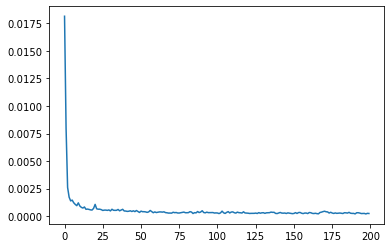

In [117]:



pyplot.plot(history.history['mse'])
pyplot.show()

In [118]:
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 8.9960e-04 - mse: 8.9960e-04


[0.0008995979442261159, 0.0008995979442261159]

In [119]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

22/22 [==============================] - 0s 1ms/step - loss: 8.9960e-04 - mse: 8.9960e-04
test loss, test acc: [0.0008995979442261159, 0.0008995979442261159]


In [120]:
predictions = model.predict(X_test)

In [121]:
y_test.head(10)

4387    0.165650
3242    0.050080
280     0.430177
675     0.092777
679     0.102087
4595    0.165971
4224    0.239165
69      0.270305
3007    0.105939
2608    0.135795
Name: closing_price, dtype: float64

In [122]:
print(predictions)

[[0.16817364]
 [0.05666885]
 [0.382012  ]
 [0.10003656]
 [0.0990428 ]
 [0.16022041]
 [0.22736543]
 [0.25954193]
 [0.10180065]
 [0.1729148 ]
 [0.22130021]
 [0.14531302]
 [0.05655423]
 [0.11840543]
 [0.10080704]
 [0.15736353]
 [0.11449358]
 [0.22717744]
 [0.04949522]
 [0.09553227]
 [0.17469576]
 [0.22714764]
 [0.1580737 ]
 [0.12211284]
 [0.04221559]
 [0.11352023]
 [0.19840154]
 [0.13269243]
 [0.10168099]
 [0.11255473]
 [0.13147679]
 [0.15190068]
 [0.05926603]
 [0.06896818]
 [0.26453793]
 [0.08701819]
 [0.19886121]
 [0.33864588]
 [0.17380512]
 [0.522624  ]
 [0.03535524]
 [0.19304067]
 [0.17539495]
 [0.1533806 ]
 [0.1721752 ]
 [0.08935297]
 [0.14357391]
 [0.08911583]
 [0.06362432]
 [0.3822652 ]
 [0.1763188 ]
 [0.3628176 ]
 [0.09212777]
 [0.11881107]
 [0.19384694]
 [0.1343798 ]
 [0.22448483]
 [0.11334115]
 [0.09310171]
 [0.05938062]
 [0.09924385]
 [0.093523  ]
 [0.18679282]
 [0.07416296]
 [0.15071401]
 [0.05638391]
 [0.089843  ]
 [0.12072924]
 [0.06917211]
 [0.08067042]
 [0.15656757]
 [0.10

In [123]:
predictions_array= np.array(predictions)

In [87]:
predictions_array


array([[0.17595729],
       [0.06507832],
       [0.3977676 ],
       [0.10681722],
       [0.10624412],
       [0.1641401 ],
       [0.22929338],
       [0.25514022],
       [0.10093722],
       [0.17496496],
       [0.20884785],
       [0.14632219],
       [0.06280231],
       [0.12460688],
       [0.10725078],
       [0.16250554],
       [0.12258974],
       [0.24727806],
       [0.0597063 ],
       [0.10478592],
       [0.1798796 ],
       [0.22919375],
       [0.1400694 ],
       [0.13074985],
       [0.05615515],
       [0.11929414],
       [0.20321548],
       [0.14301792],
       [0.10080633],
       [0.12477294],
       [0.13591522],
       [0.15711913],
       [0.07042849],
       [0.07294878],
       [0.34878033],
       [0.09152475],
       [0.20374668],
       [0.33884126],
       [0.17851135],
       [0.52924156],
       [0.04083124],
       [0.19648042],
       [0.1690414 ],
       [0.15804863],
       [0.17099956],
       [0.09865722],
       [0.14482364],
       [0.097

In [124]:
predictions_array3=np.asanyarray(predictions_array2)

In [90]:
predictions_array3

array([0.17595729, 0.06507832, 0.3977676 , 0.10681722, 0.10624412,
       0.1641401 , 0.22929338, 0.25514022, 0.10093722, 0.17496496,
       0.20884785, 0.14632219, 0.06280231, 0.12460688, 0.10725078,
       0.16250554, 0.12258974, 0.24727806, 0.0597063 , 0.10478592,
       0.1798796 , 0.22919375, 0.1400694 , 0.13074985, 0.05615515,
       0.11929414, 0.20321548, 0.14301792, 0.10080633, 0.12477294,
       0.13591522, 0.15711913, 0.07042849, 0.07294878, 0.34878033,
       0.09152475, 0.20374668, 0.33884126, 0.17851135, 0.52924156,
       0.04083124, 0.19648042, 0.1690414 , 0.15804863, 0.17099956,
       0.09865722, 0.14482364, 0.09743464, 0.06877837, 0.38537237,
       0.16531467, 0.3900125 , 0.10405368, 0.12393537, 0.19920135,
       0.14355487, 0.22932866, 0.13617519, 0.10043135, 0.07005531,
       0.11158952, 0.10991421, 0.19673696, 0.07973537, 0.1582087 ,
       0.06053463, 0.10054407, 0.12522927, 0.07298446, 0.08166409,
       0.16299295, 0.11918393, 0.14951274, 0.2317648 , 0.19794

In [125]:

from sklearn.metrics import r2_score

In [126]:
r2 = r2_score(y_test, predictions_array3)
r2

0.953511556842256

In [127]:
metric_df = pd.DataFrame(index = ['R2'] ,columns = ['Ann'])
metric_df

,Ann
R2,NaN


In [128]:
metric_df.at['R2','Ann'] = r2_score(y_test, predictions_array3)

In [129]:
metric_df

,Ann
R2,0.953512
